In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm


In [2]:
data = pd.read_csv(r'initial_dummied_data_TRAIN.csv')

In [3]:
data

,SalePrice,GrLivArea,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,MSSubClass_>1-story,MSSubClass_multi_fam,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,Fireplaces,NoCentralAir,SchD_S
0,143000,1632,1632,0,8,4,2,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,153500,1226,1226,0,7,2,1,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,199900,1241,1241,0,4,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,113000,793,793,0,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,131900,796,796,0,4,2,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,270000,1959,1088,871,8,3,2,1,1,0,...,0,1,0,0,1,1,0,1,0,0
1724,173000,1675,1675,0,8,3,2,0,0,0,...,0,0,0,0,0,1,0,2,0,0
1725,67500,1012,1012,0,5,2,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1726,132000,970,970,0,6,3,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0


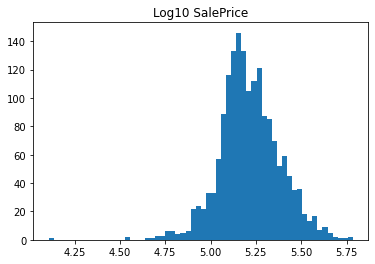

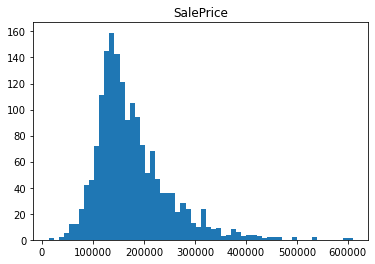

In [4]:
bins=60
plt.hist(np.log10(data['SalePrice']), bins=bins)
plt.title('Log10 SalePrice')
plt.show()
plt.hist(data['SalePrice'], bins=bins)
plt.title('SalePrice')
plt.show()

Maybe our models should regress against log-transformed price??

In [5]:
ppsq = data['SalePrice']/data['GrLivArea']
ppsq

0        87.622549
1       125.203915
2       161.079774
3       142.496847
4       165.703518
           ...    
1723    137.825421
1724    103.283582
1725     66.699605
1726    136.082474
1727     86.864407
Length: 1728, dtype: float64

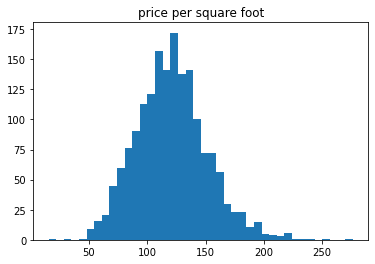

In [6]:
plt.hist(ppsq, bins=40)
plt.title('price per square foot')
plt.show()

Price per square foot looks much more like normally distributed data than price alone does, or even log-price. Still not really great though.

### Start of Multicollinearity Testing

First, I will get a list of all categorical variables. Then I will loop through the list to find the R^2 for each variable vs all others, the test if there is multicollinearity present.

In [7]:
print('Column names: ', data.columns)
data.T.iloc[:52,0:4]


Column names:  Index(['SalePrice', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'BedroomAbvGr', 'FullBath', 'HalfBath', 'MSSubClass_>1-story',
       'MSSubClass_multi_fam',
       ...
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'UnpavedDrive', 'WoodDeckBinary', 'HasPorch', 'FenceBinary',
       'Fireplaces', 'NoCentralAir', 'SchD_S'],
      dtype='object', length=103)


,0,1,2,3
SalePrice,143000.0,153500.0,199900.0,113000.0
GrLivArea,1632.0,1226.0,1241.0,793.0
1stFlrSF,1632.0,1226.0,1241.0,793.0
2ndFlrSF,0.0,0.0,0.0,0.0
TotRmsAbvGrd,8.0,7.0,4.0,4.0
BedroomAbvGr,4.0,2.0,1.0,2.0
FullBath,2.0,1.0,1.0,1.0
HalfBath,0.0,1.0,1.0,0.0
MSSubClass_>1-story,0.0,0.0,0.0,0.0
MSSubClass_multi_fam,1.0,0.0,0.0,0.0


In [8]:
y_col = data['SalePrice']
x_cols = data.drop('SalePrice', axis=1)

In [9]:
numeric_cols = []
for col in x_cols.columns:
    if len(data[col].value_counts()) > 14:
        numeric_cols.append(col)
numeric_cols

['GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LotArea',
 'LndAc_S',
 'MasVnrArea',
 'YearBuilt',
 'RemodelYrsAftBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'GarageArea']

In [10]:
RSquared = []
variable_name = []
for var in numeric_cols:
    indep_var = x_cols[var]
    predictors = x_cols.drop(var, axis=1)
    ols = linear_model.LinearRegression()
    ols.fit(predictors, indep_var)
    variable_name.append(var)
    RSquared.append(ols.score(predictors, indep_var))

val_dfs = pd.concat([pd.Series(RSquared), pd.Series(variable_name)], axis=1)
val_dfs = val_dfs.sort_values(by=0, ascending=False)
val_dfs

,0,1
0,0.992906,GrLivArea
2,0.990619,2ndFlrSF
1,0.989185,1stFlrSF
6,0.933375,YearBuilt
4,0.925943,LndAc_S
8,0.865488,TotalBsmtSF
10,0.835324,GarageArea
7,0.756348,RemodelYrsAftBuilt
9,0.642265,BsmtUnfSF
5,0.609467,MasVnrArea


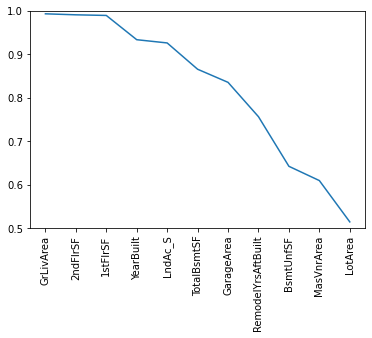

In [11]:
plt.plot(val_dfs[1], val_dfs[0])
plt.xticks(rotation=90)
plt.ylim(0.5,1)
plt.show()

## Regression w/o 1stFlrSF

GrLivArea, 2ndFlrSF, and 1stFlrSF show almost perfect multicollinearity with the other columns, I bet if we drop 1stFloorSF this will look a lot better. Keep 2ndFlrSF since it gives us info on floors as well. Redoing this w/o 1stFlrSF in the dataset.

In [16]:
x_cols_reduced = x_cols.drop('1stFlrSF', axis=1)

In [17]:
numeric_cols_reduced = []
for col in x_cols_reduced.columns:
    if len(data[col].value_counts()) > 14:
        numeric_cols_reduced.append(col)
numeric_cols_reduced

['GrLivArea',
 '2ndFlrSF',
 'LotArea',
 'LndAc_S',
 'MasVnrArea',
 'YearBuilt',
 'RemodelYrsAftBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'GarageArea']

In [18]:
RSquared = []
variable_name = []
for var in numeric_cols_reduced:
    indep_var = x_cols_reduced[var]
    predictors = x_cols_reduced.drop(var, axis=1)
    ols = linear_model.LinearRegression()
    ols.fit(predictors, indep_var)
    variable_name.append(var)
    RSquared.append(ols.score(predictors, indep_var))

val_dfs_reduced = pd.concat([pd.Series(RSquared), pd.Series(variable_name)], axis=1)
val_dfs_reduced = val_dfs_reduced.sort_values(by=0, ascending=False)
val_dfs_reduced

,0,1
5,0.933254,YearBuilt
3,0.925445,LndAc_S
0,0.923119,GrLivArea
1,0.904671,2ndFlrSF
7,0.863291,TotalBsmtSF
9,0.835287,GarageArea
6,0.755580,RemodelYrsAftBuilt
8,0.642264,BsmtUnfSF
4,0.609213,MasVnrArea
2,0.514416,LotArea


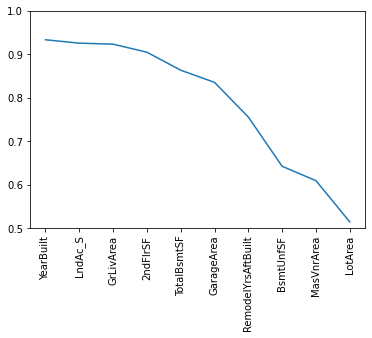

In [19]:
plt.plot(val_dfs_reduced[1], val_dfs_reduced[0])
plt.xticks(rotation=90)
plt.ylim(0.5,1)
plt.show()

In [21]:
categorical_vars = []
for col in x_cols_reduced:
    if col in numeric_cols_reduced:
        continue
    categorical_vars.append(col)
categorical_vars

['TotRmsAbvGrd',
 'BedroomAbvGr',
 'FullBath',
 'HalfBath',
 'MSSubClass_>1-story',
 'MSSubClass_multi_fam',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BldgType_2Fam',
 'LotShape_IR',
 'SlopedLot',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Pos',
 'Condition1_RailRd',
 'NonStdElectrical',
 'MasVnrType_BrkFace',
 'MasVnrType_StoneBrkcom',
 'RoofStyle_Hip',
 'RoofStyle_Other',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkFace',
 'Exterior1st_HdbdOther',
 'Exterior1st_MetalSd',
 'Exterior1st_Stc_CemBd_WdSdSh',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'OverallQual',
 'OverallCondBinary',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'HeatingQC_Fa',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_Fa',
 'Remodeled',
 'Functional_Min',
 'Functional_Maj',
 'FireplaceQu_Ex',
 'FireplaceQu_Gd',
 'FireplaceQu_TA',
 'FireplaceQu_Fa',
 'Firepl

Plan: Investigate the overlap observation counts for all the different quality categorical variables

In [29]:
data.groupby(['BedroomAbvGr', 'TotRmsAbvGrd']).agg(['count', 'mean'])[['SalePrice', 'GrLivArea']]

SalePrice                GrLivArea             
                              count           mean     count         mean
BedroomAbvGr TotRmsAbvGrd                                                
0            3                    2  142500.000000         2   948.000000
             4                    2  202000.000000         2  1290.000000
             5                    2  335500.000000         2  1717.500000
1            3                   11  100390.909091        11   683.090909
             4                   31  158283.064516        31  1041.129032
             5                   10  228403.000000        10  1320.300000
             6                    8  215150.625000         8  1427.000000
             7                    2  311464.500000         2  1869.000000
             8                    1  394432.000000         1  1856.000000
2            3                    2  145000.000000         2  1248.000000
             4                  100  115137.200000       100   906.310000
             5                  195  145441.030769       195  1113.882051
             6                  108  185711.314815       108  1380.694444
             7                   37  249135.972973        37  1724.810811
             8                    8  233145.500000         8  1660.750000
             9                    1  202500.000000         1  1827.000000
3            4                    5  135000.000000         5  1316.800000
             5                  150  128319.113333       150  1050.786667
             6                  352  157726.605114       352  1317.397727
             7                  300  195884.490000       300  1641.773333
             8                   96  229141.375000        96  1861.802083
             9                   23  240911.956522        23  2085.130435
             10                   5  401932.400000         5  2301.400000
             11                   1  191000.000000         1  2555.000000
             12                   1  200500.000000         1  3086.000000
4            6                    8  157125.000000         8  1670.625000
             7                   56  168333.428571        56  1706.232143
             8                   90  191578.800000        90  1931.188889
             9                   50  260124.000000        50  2370.720000
             10                  19  293735.947368        19  2433.000000
             11                   7  301383.285714         7  2747.285714
             12                   4  277750.000000         4  2492.000000
5            7                    3  256300.000000         3  2526.666667
             8                    6  174083.333333         6  2016.833333
             9                    5  172200.000000         5  2071.400000
             10                   8  191037.500000         8  2349.000000
             11                   4  242425.000000         4  3047.000000
             12                   2  175650.000000         2  2678.000000
             13                   1  205000.000000         1  2480.000000
6            8                    2  269500.000000         2  2787.000000
             9                    1  135900.000000         1  1716.000000
             10                   8  132100.000000         8  1882.625000
             12                   1  150000.000000         1  2592.000000

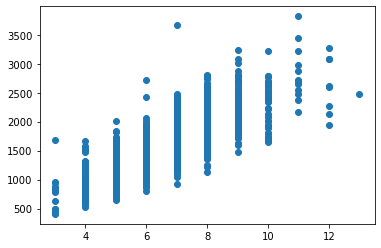

In [28]:
plt.scatter(data['TotRmsAbvGrd'], data['GrLivArea'])

In [32]:
ols=linear_model.LinearRegression()
ols.fit(data[['TotRmsAbvGrd']], data['GrLivArea'])
print('R^2 for SLR of TotRmsAbvGrd predicting GrLivArea', round(ols.score(data[['TotRmsAbvGrd']], data['GrLivArea']),2))

R^2 for SLR of TotRmsAbvGrd predicting GrLivArea 0.65


## The above three peices of info indicate that totRmsAbvGrd don't add much that GrLivArea doesn't already capture, and that it results in significant multicollinearity between the two. Drop TotRmsAbvGrd.